In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [3]:

# Read the CSV file into a DataFrame
df_raw = pd.read_csv(r'D:\Desktop\airbnb\sample_airbnb.listingsAndReviews.csv')

# Extract the specified columns
df= df_raw[['_id', 'listing_url', 'name', 'property_type', 'room_type', 'bed_type', 'minimum_nights',
                  'maximum_nights', 'cancellation_policy', 'accommodates', 'bedrooms', 'beds', 'number_of_reviews',
                  'bathrooms', 'price', 'extra_people', 'guests_included','country','host_name','country_code',
                    'review_scores', 'availability_365','host_total_listings_count','cleaning_fee',]]

# Display the extracted DataFrame
df.info()


C:\Users\Hp15\AppData\Local\Temp\ipykernel_8616\3677255370.py:2: DtypeWarning: Columns (76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,133,134,135,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   _id                        5555 non-null   int64  
 1   listing_url                5555 non-null   object 
 2   name                       5547 non-null   object 
 3   property_type              5555 non-null   object 
 4   room_type                  5555 non-null   object 
 5   bed_type                   5555 non-null   object 
 6   minimum_nights             5555 non-null   int64  
 7   maximum_nights             5555 non-null   int64  
 8   cancellation_policy        5555 non-null   object 
 9   accommodates               5555 non-null   int64  
 10  bedrooms                   5550 non-null   float64
 11  beds                       5542 non-null   float64
 12  number_of_reviews          5555 non-null   int64  
 13  bathrooms                  5545 non-null   float

In [4]:
df.price = df.price.astype(str).astype(float)
df.cleaning_fee = df.cleaning_fee[~df.cleaning_fee.isna()].astype(str).astype(float)
df.extra_people = df.extra_people.astype(str).astype(float)
df.guests_included = df.guests_included.astype(str).astype(float)
df.review_scores = df.review_scores.astype('Int64')

C:\Users\Hp15\AppData\Local\Temp\ipykernel_8616\2991551035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.price = df.price.astype(str).astype(float)
C:\Users\Hp15\AppData\Local\Temp\ipykernel_8616\2991551035.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.cleaning_fee = df.cleaning_fee[~df.cleaning_fee.isna()].astype(str).astype(float)
C:\Users\Hp15\AppData\Local\Temp\ipykernel_8616\2991551035.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [5]:
df.isna().sum()

_id                             0
listing_url                     0
name                            8
property_type                   0
room_type                       0
bed_type                        0
minimum_nights                  0
maximum_nights                  0
cancellation_policy             0
accommodates                    0
bedrooms                        5
beds                           13
number_of_reviews               0
bathrooms                      10
price                           0
extra_people                    0
guests_included                 0
country                         0
host_name                       0
country_code                    0
review_scores                1476
availability_365                0
host_total_listings_count       0
cleaning_fee                 1531
dtype: int64

In [9]:
# Filling Total bedrooms with mode
df.bedrooms.fillna(df.bedrooms.mode()[0],inplace=True)

# Filling Total beds with median because data has outliers
df.beds.fillna(df.beds.median(),inplace=True)
df.bathrooms.fillna(df.bathrooms.median(),inplace=True)
df.cleaning_fee.fillna(df.cleaning_fee.median(),inplace=True)
df.review_scores.fillna(df.review_scores.median(),inplace=True)
df.name.fillna(df.review_scores.median(),inplace=True)

C:\Users\Hp15\AppData\Local\Temp\ipykernel_8616\1895361853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.bedrooms.fillna(df.bedrooms.mode()[0],inplace=True)
C:\Users\Hp15\AppData\Local\Temp\ipykernel_8616\1895361853.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.beds.fillna(df.beds.median(),inplace=True)
C:\Users\Hp15\AppData\Local\Temp\ipykernel_8616\1895361853.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.ba

In [10]:
df.isna().sum()

_id                          0
listing_url                  0
name                         0
property_type                0
room_type                    0
bed_type                     0
minimum_nights               0
maximum_nights               0
cancellation_policy          0
accommodates                 0
bedrooms                     0
beds                         0
number_of_reviews            0
bathrooms                    0
price                        0
extra_people                 0
guests_included              0
country                      0
host_name                    0
country_code                 0
review_scores                0
availability_365             0
host_total_listings_count    0
cleaning_fee                 0
dtype: int64

In [11]:
df[df.duplicated()]

,_id,listing_url,name,property_type,room_type,bed_type,minimum_nights,maximum_nights,cancellation_policy,accommodates,...,price,extra_people,guests_included,country,host_name,country_code,review_scores,availability_365,host_total_listings_count,cleaning_fee


In [12]:
# Name Column has empty values and some duplicates hence dropping them
df.drop(labels=list(df[df.name.duplicated(keep=False)].index),inplace=True)

C:\Users\Hp15\AppData\Local\Temp\ipykernel_8616\1013235921.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(labels=list(df[df.name.duplicated(keep=False)].index),inplace=True)


In [13]:
df.reset_index(drop=True,inplace=True)

In [14]:
#converting df to csv file and saving it
df.to_csv('airbnb_data.csv',index=False)

Top 10 Property Types available

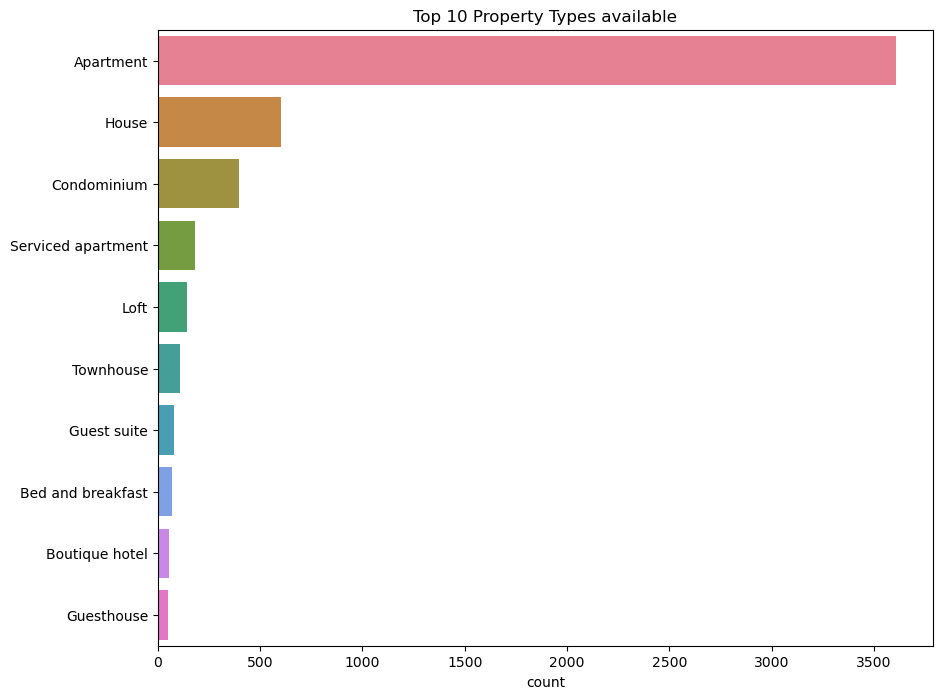

In [16]:

# Create a color palette
palette = sns.color_palette("husl", 10)  

# Create the countplot
plt.figure(figsize=(10, 8))
ax = sns.countplot(data=df, y=df.property_type.values, order=df.property_type.value_counts().index[:10], palette=palette)
ax.set_title("Top 10 Property Types available")

plt.show()


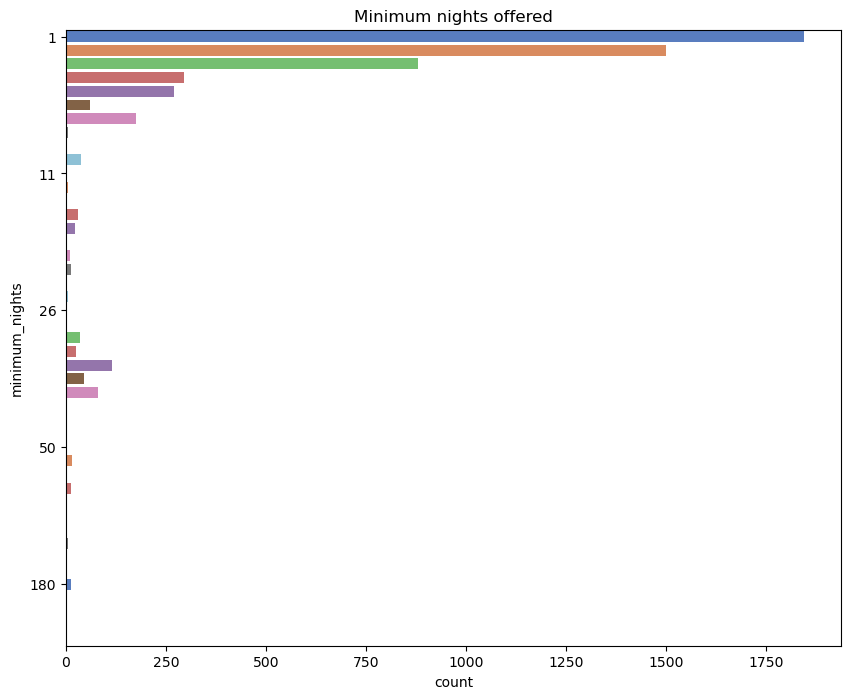

In [17]:

plt.figure(figsize=(10,8))
ax = sns.countplot(data=df, y=df.minimum_nights,palette='muted')  # Changed x to y
ax.set_title("Minimum nights offered")
# Set the range for y-axis ticks
ax.set_yticks(range(0, len(df.minimum_nights.unique()), 10))

plt.show()


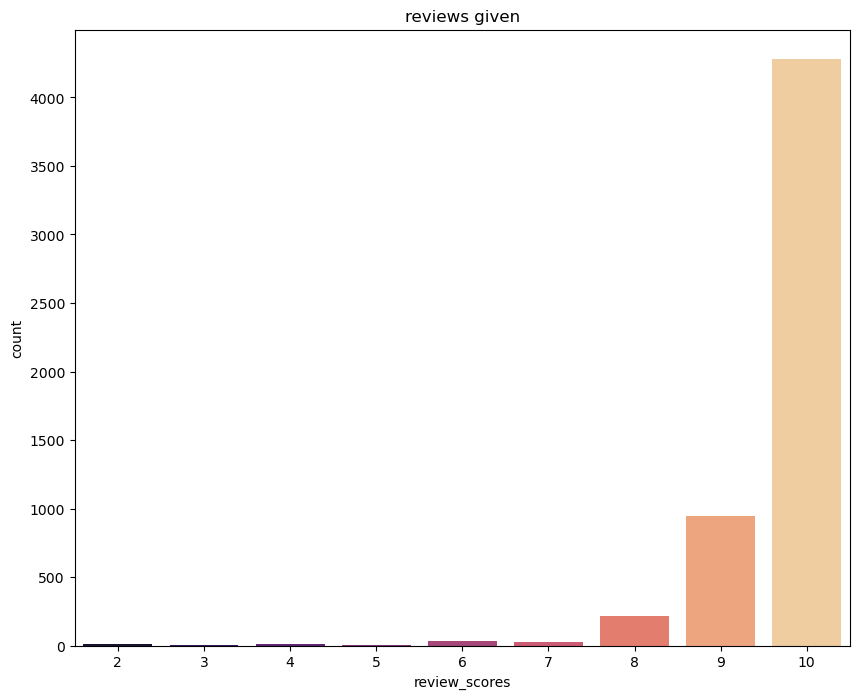

In [18]:
plt.figure(figsize=(10,8))
ax=sns.countplot(data=df,x=df.review_scores,palette="magma")
ax.set_title("reviews given")
plt.show()

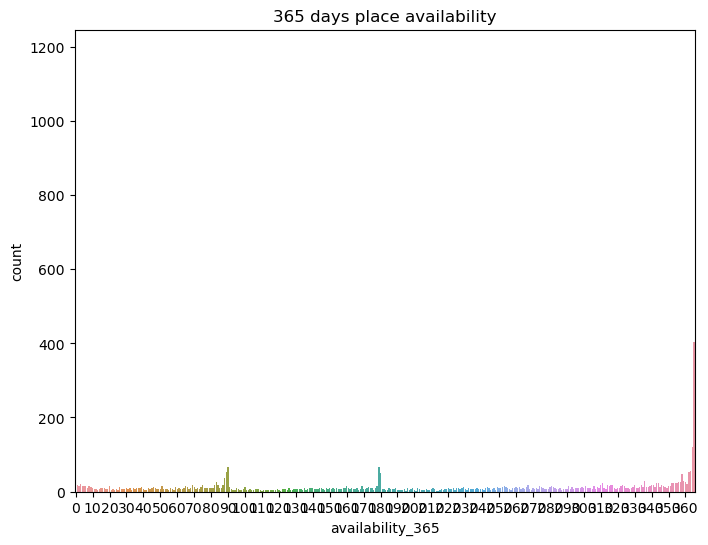

In [19]:
plt.figure(figsize=(8,6))
ax = sns.countplot(data=df,x=df.availability_365)
ax.set_title("365 days place availability")
ax.set_xticks(range(0, len(df.availability_365.unique()), 10)) 



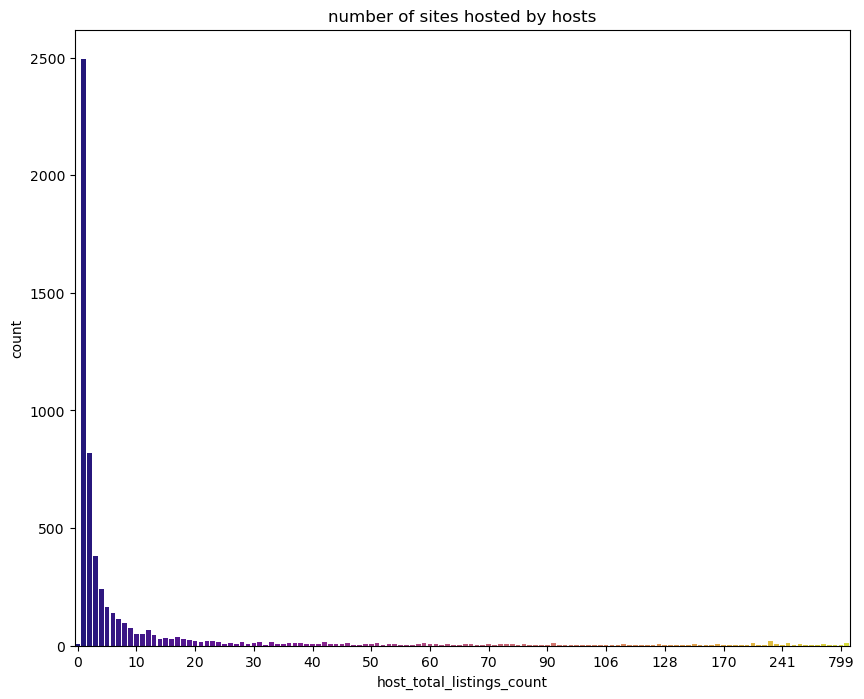

In [20]:
plt.figure(figsize=(10,8))
ax = sns.countplot(data=df,x=df.host_total_listings_count,palette="plasma")
ax.set_title("number of sites hosted by hosts")
ax.set_xticks(range(0, len(df.host_total_listings_count.unique()), 10)) 


Text(0.5, 1.0, 'Total Listings in each Room Type')

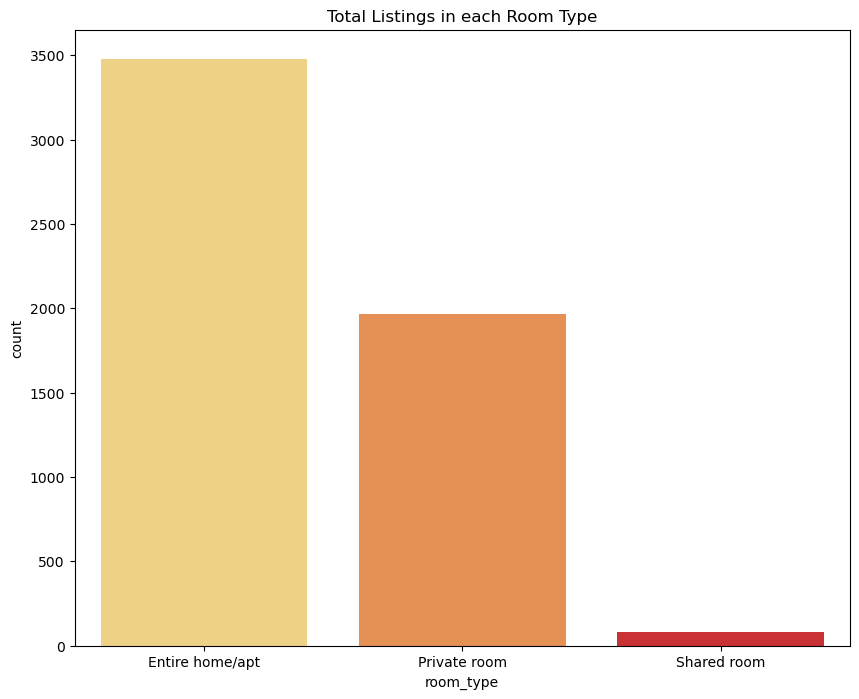

In [21]:
plt.figure(figsize=(10,8))
ax = sns.countplot(data=df,x=df.room_type,palette="YlOrRd")
ax.set_title("Total Listings in each Room Type")

In [22]:
#top 10 host with highest number of listings
df.host_name.value_counts()

Maria              37
David              26
Ana                21
Sarah              20
Jov                18
                   ..
Yonette             1
Emerald             1
Pamela & Rafael     1
Phan                1
Başbuğ              1
Name: host_name, Length: 3134, dtype: int64

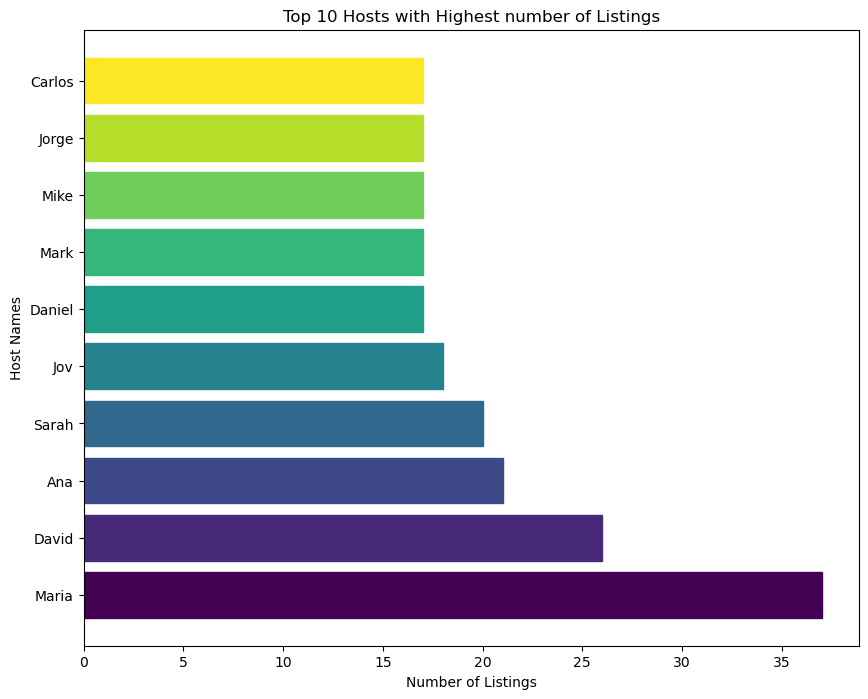

In [23]:
# Extract top 10 hosts
top_hosts = df['host_name'].value_counts().nlargest(10)

# Create a color palette for each bar
colors = plt.cm.viridis(np.linspace(0, 1, len(top_hosts)))

# Create a bar chart
plt.figure(figsize=(10, 8))
bars = plt.barh(top_hosts.index, top_hosts.values, color=colors)

# Add title and labels
plt.title("Top 10 Hosts with Highest number of Listings")
plt.xlabel("Number of Listings")
plt.ylabel("Host Names")

# Add color legend
for bar, color in zip(bars, colors):
    bar.set_color(color)
plt.show()


Avg Listing Price in each Countries'

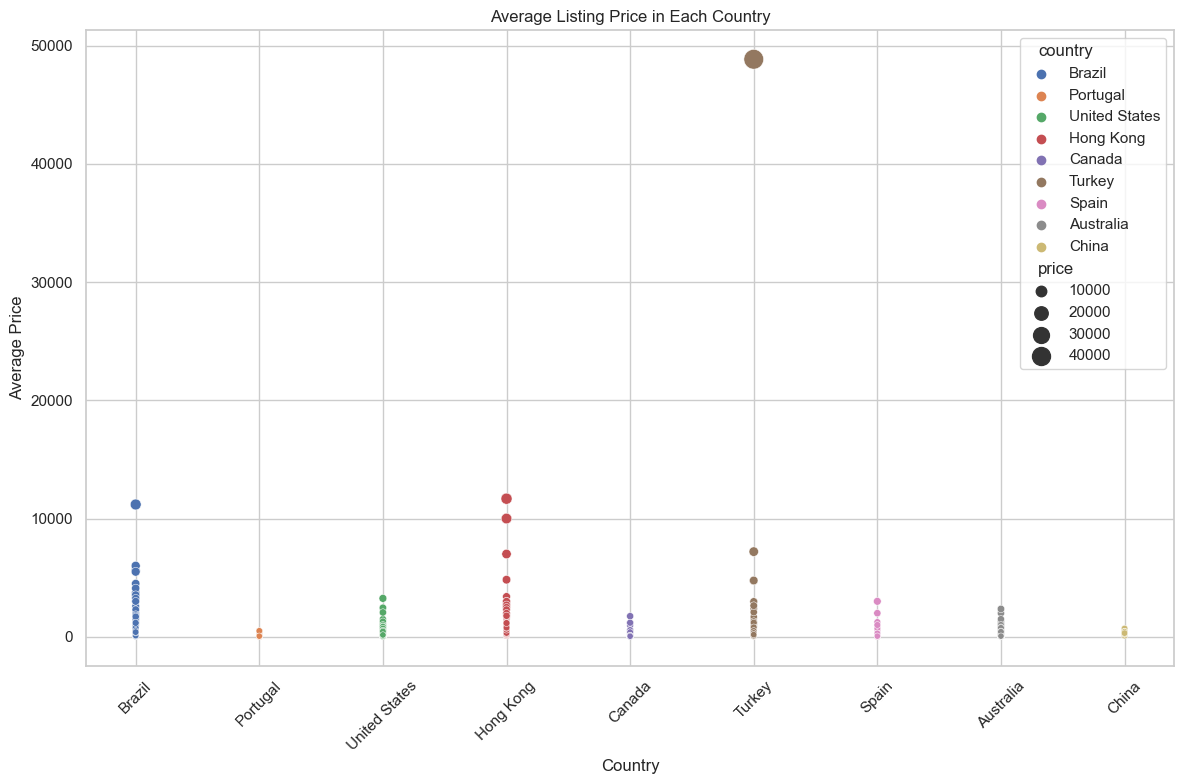

In [24]:

# Set the style of the plot
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='country', y='price', hue='country', size='price', sizes=(20, 200))
plt.title('Average Listing Price in Each Country')
plt.xlabel('Country')
plt.ylabel('Average Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

REVIEW SCORE IN EACH ROOM TYPE

Text(0, 0.5, 'Average Review Scores')

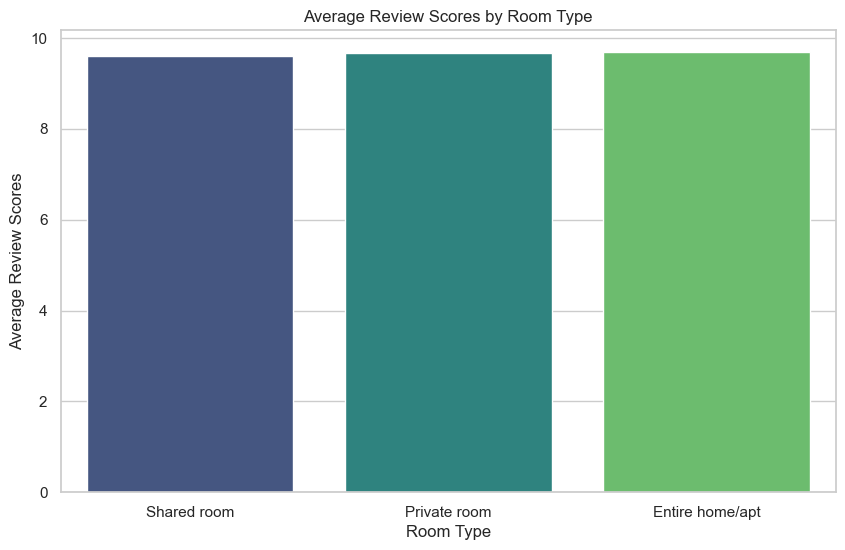

In [25]:
rev_df = df.groupby('room_type',as_index=False)['review_scores'].mean().sort_values(by='review_scores')

# Set the style of the plot
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=rev_df, x='room_type', y='review_scores', palette='viridis')
plt.title('Average Review Scores by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Review Scores')

PRICE IN EACH ROOM TYPE

Text(0, 0.5, 'Average Price')

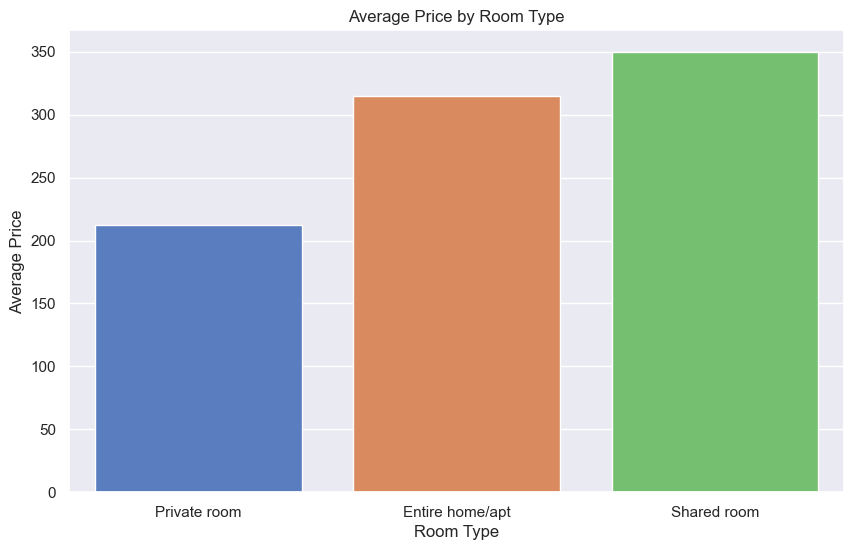

In [26]:
pr_df = df.groupby('room_type',as_index=False)['price'].mean().sort_values(by='price')
# Set the style of the plot
sns.set(style="darkgrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=pr_df, x='room_type', y='price', palette='muted')
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')

C:\Users\Hp15\AppData\Local\Temp\ipykernel_8616\4227571194.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_category'] = df['price'].apply(categorize_price)


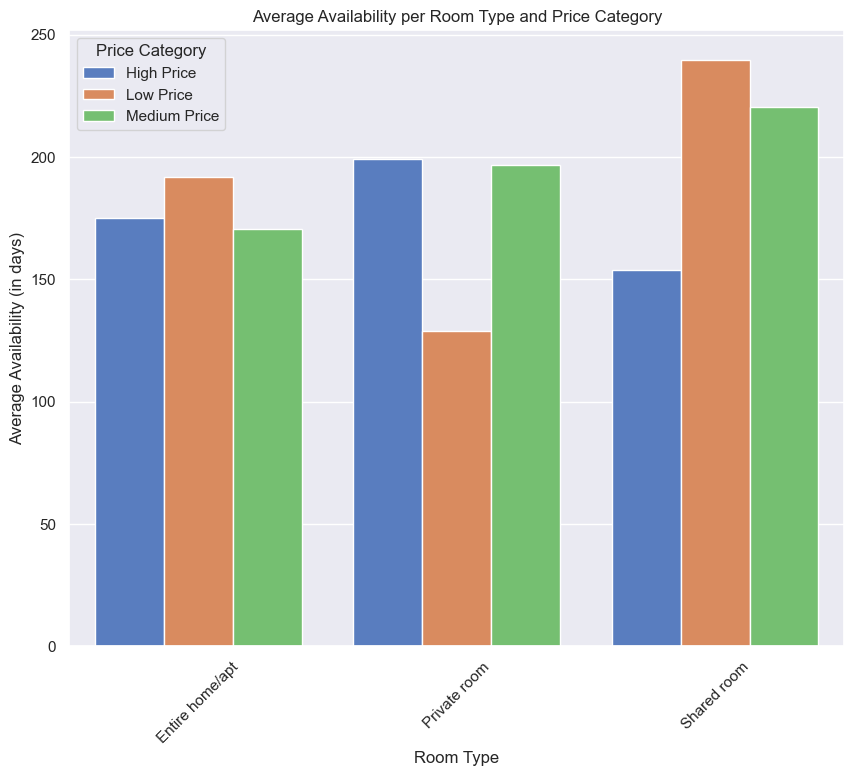

In [27]:

# Define price categories (you should adjust these thresholds based on your data)
low_price = df['price'].quantile(0.25)  # Lower quartile
high_price = df['price'].quantile(0.75)  # Upper quartile

# Function to categorize prices
def categorize_price(price):
    if price <= low_price:
        return 'Low Price'
    elif price <= high_price:
        return 'Medium Price'
    else:
        return 'High Price'

# Apply categorization to create a new column 'price_category'
df['price_category'] = df['price'].apply(categorize_price)

# Grouping by room type and price category, and calculating mean availability_365
average_availability_by_room_type_price = df.groupby(['room_type', 'price_category'])['availability_365'].mean().reset_index()

# Create the bar chart
plt.figure(figsize=(10, 8))
sns.barplot(data=average_availability_by_room_type_price, x='room_type', y='availability_365', hue='price_category', palette='muted')
plt.title('Average Availability per Room Type and Price Category')
plt.xlabel('Room Type')
plt.ylabel('Average Availability (in days)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add legend
plt.legend(title='Price Category')
plt.show()


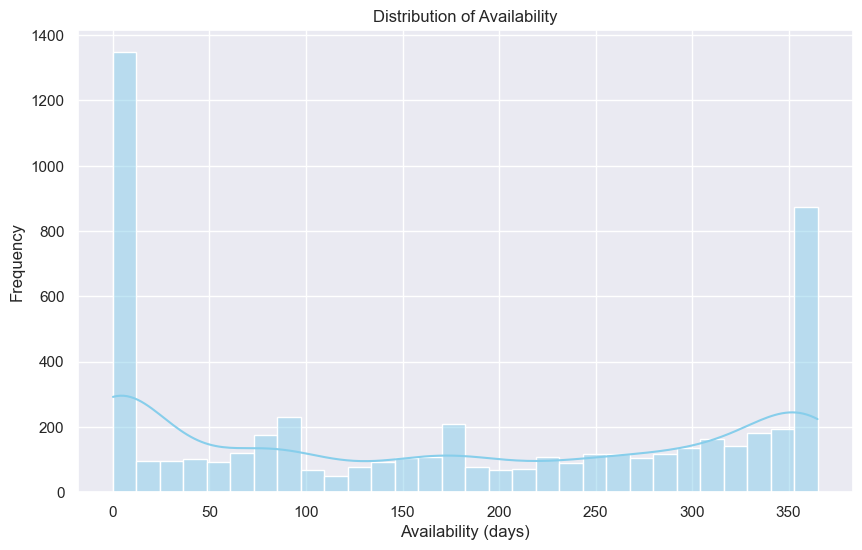

In [29]:

# Set the style of the plot
sns.set(style="darkgrid")

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['availability_365'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Availability')
plt.xlabel('Availability (days)')
plt.ylabel('Frequency')
plt.show()


3. Having a high price range, Entire home/apt types of rooms are available for less than 100 days on average followed by Private rooms on an average of 105 days and Shared rooms around 155 days on average being the lowest in price.

● Most of the sites hosted have less than 100 days of availability in comparison to all 365 days. Also, the majority of them have provided 0 days availability which has to be cross-checked by the Hosting Acquisition and Operations teams to know the reason.